In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import dask.array as da
import pyproj
import sys
from joblib import Parallel, delayed
from tqdm import tqdm
from pycontrails import Flight, Fleet, MetDataset
from pycontrails.core import models
from pycontrails.datalib.ecmwf import ERA5
from pycontrails.physics import geo, thermo, units, constants
from pycontrails.models.gpat.gpat import GPAT

In [4]:
fl = pd.read_pickle("outputs/116573/fl_116573.pkl")
fl

,longitude,latitude,altitude,time,air_temperature,specific_humidity,true_airspeed,flight_id,aircraft_mass,engine_efficiency,...,NO,NO2,CO,HCHO,CH3CHO,C2H4,C3H6,C2H2,BENZENE,waypoint
0,0.125,0.100000,12500.0,2022-01-20 13:00:00,212.263516,0.000219,100.564816,0.0,62090.764980,0.100054,...,2.048473,0.107814,0.062195,0.000728,0.000243,0.00091,0.000243,0.000243,0.000121,0
1,0.125,0.208524,12500.0,2022-01-20 13:02:00,212.260586,0.000220,100.564816,0.0,61949.103196,0.100054,...,2.048571,0.107820,0.062195,0.000728,0.000243,0.00091,0.000243,0.000243,0.000121,1
2,0.125,0.317048,12500.0,2022-01-20 13:04:00,212.257656,0.000221,100.564816,0.0,61807.434026,0.100055,...,2.048670,0.107825,0.062196,0.000728,0.000243,0.00091,0.000243,0.000243,0.000121,2
3,0.125,0.425573,12500.0,2022-01-20 13:06:00,212.254726,0.000223,100.564816,0.0,61665.757471,0.100055,...,2.048769,0.107830,0.062196,0.000728,0.000243,0.00091,0.000243,0.000243,0.000121,3
4,0.125,0.534097,12500.0,2022-01-20 13:08:00,212.251796,0.000224,100.564816,0.0,61524.073531,0.100055,...,2.048867,0.107835,0.062196,0.000728,0.000243,0.00091,0.000243,0.000243,0.000121,4
5,0.125,0.642621,12500.0,2022-01-20 13:10:00,212.248865,0.000226,100.564816,0.0,61382.382203,0.100056,...,2.048966,0.107840,0.062197,0.000728,0.000243,0.00091,0.000243,0.000243,0.000121,5
6,0.125,0.751145,12500.0,2022-01-20 13:12:00,212.245935,0.000227,100.564816,0.0,61240.683488,0.100056,...,2.049065,0.107846,0.062197,0.000728,0.000243,0.00091,0.000243,0.000243,0.000121,6
7,0.125,0.859670,12500.0,2022-01-20 13:14:00,212.243005,0.000228,100.564816,0.0,61098.977386,0.100056,...,2.049065,0.107846,0.062197,0.000728,0.000243,0.00091,0.000243,0.000243,0.000121,7


In [ ]:
pl = pd.read_pickle("outputs/116573/pl_116573.pkl")
pl

In [ ]:
chem = xr.open_dataset("outputs/chem.nc")

chem

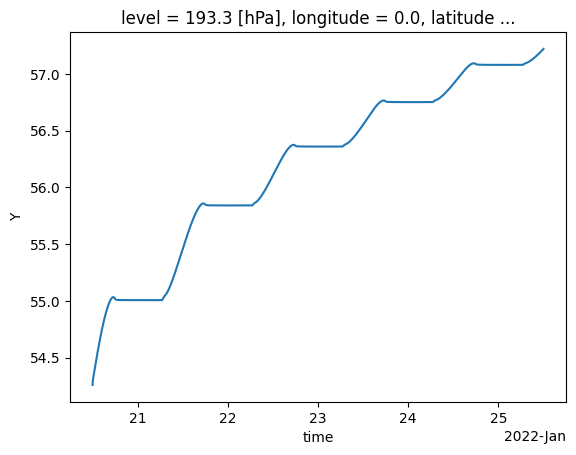

In [3]:
chem["Y"].sel(species_out=3, longitude=0.0, latitude=0.0).sel(level=193, method="nearest").plot()